## Task: 
Tackle the Titanic dataset. A great place to start is on Kaggle. Alternatively, you
can download the data from https://homl.info/titanic.tgz and unzip this tarball
like you did for the housing data in Chapter 2. This will give you two CSV files,
train.csv and test.csv, which you can load using pandas.read_csv(). The goal
is to train a classifier that can predict the Survived column based on the other
columns.

## Download data and explore

In [216]:
# how to download dataset from url
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

url = "https://homl.info/titanic.tgz"
path = os.path.join("datasets", "titanic")

def fetch_titanic_data(url, path):
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "titanic.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    titanic_tgz = tarfile.open(tgz_path)
    titanic_tgz.extractall(path=path)
    titanic_tgz.close()

In [217]:
fetch_titanic_data(url, path)

In [218]:
train_data = pd.read_csv('datasets/titanic/titanic/train.csv')
test_data = pd.read_csv('datasets/titanic/titanic/test.csv')

In [219]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [221]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [223]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The Cabin and Age are attributes have many missing values.

In [224]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [225]:
groupby_data = train_data.groupby(['Pclass'])

In [226]:
groupby_data['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [227]:
# fill age missing value with median age group by Pclass
train_data['Age'] = train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('median'))

In [228]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [229]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [230]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [231]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [232]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Feature Enneering

In [233]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [234]:
train_data['NumOfFamilyMem'] = train_data['SibSp'].astype(int) + train_data['Parch'].astype(int)
test_data['NumOfFamilyMem'] = test_data['SibSp'].astype(int) + test_data['Parch'].astype(int)

<Axes: xlabel='NumOfFamilyMem', ylabel='count'>

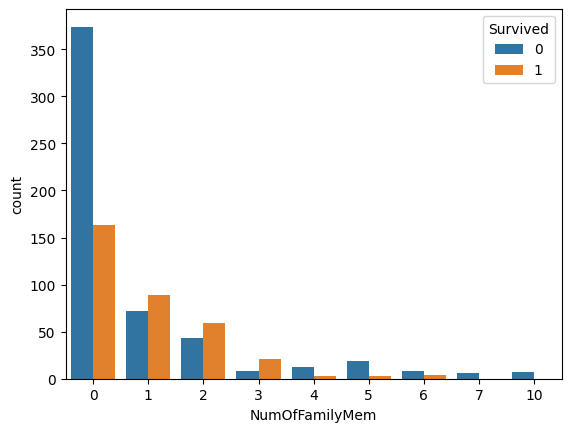

In [235]:
import seaborn as sns

sns.countplot(x='NumOfFamilyMem', data=train_data, hue='Survived')

In [236]:
train_data['FamilyMemberCat'] = pd.cut(train_data['NumOfFamilyMem'], bins=[-1, 1, 4, 7], labels=['Single', 'Small', 'Large'])
test_data['FamilyMemberCat'] = pd.cut(test_data['NumOfFamilyMem'], bins=[-1, 1, 4, 7], labels=['Single', 'Small', 'Large'])

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'median')),
    ("scaler", StandardScaler())
])

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cat_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy = 'most_frequent')),
    ("onehot_encoder", OneHotEncoder(sparse_output=False))
])

In [239]:
num_attribs = ['Age', 'NumOfFamilyMem', 'Fare']
cat_attribs = ['Sex', 'Pclass', 'Embarked', 'FamilyMemberCat']

preprocessing_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [240]:
X_train = preprocessing_pipeline.fit_transform(train_data)
X_test = preprocessing_pipeline.transform(test_data)

In [241]:
y_train = train_data['Survived']

## Training model

In [242]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [243]:
from sklearn.model_selection import cross_val_score
svc_scores = cross_val_score(svm_clf, X_train, y_train, cv=10, scoring='accuracy')

In [244]:
mean = svc_scores.mean()
std = svc_scores.std()
print(f"Mean: {mean}, Std: {std}")

Mean: 0.8226841448189763, Std: 0.02997679904479162


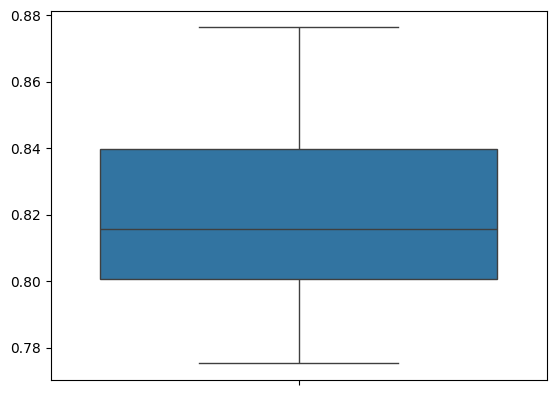

In [245]:
sns.boxplot(svc_scores)
plt.show()

In [246]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']}
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [247]:
grid_search.best_params_  

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [248]:
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

In [249]:
# make y pred to csv for submission
submission = pd.DataFrame({
    'PassengerId': test_data.index,
    'Survived': y_pred
})
submission.to_csv('datasets/titanic/titanic/submission.csv', index=False)